In [1]:
# pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Combined_ozone.csv")

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df_prophet = df[["Date", "Daily Max 8-hour Ozone Concentration"]].rename(columns={"Date": "ds", "Daily Max 8-hour Ozone Concentration": "y"})

In [6]:
df_prophet = df_prophet.sort_values(by="ds")

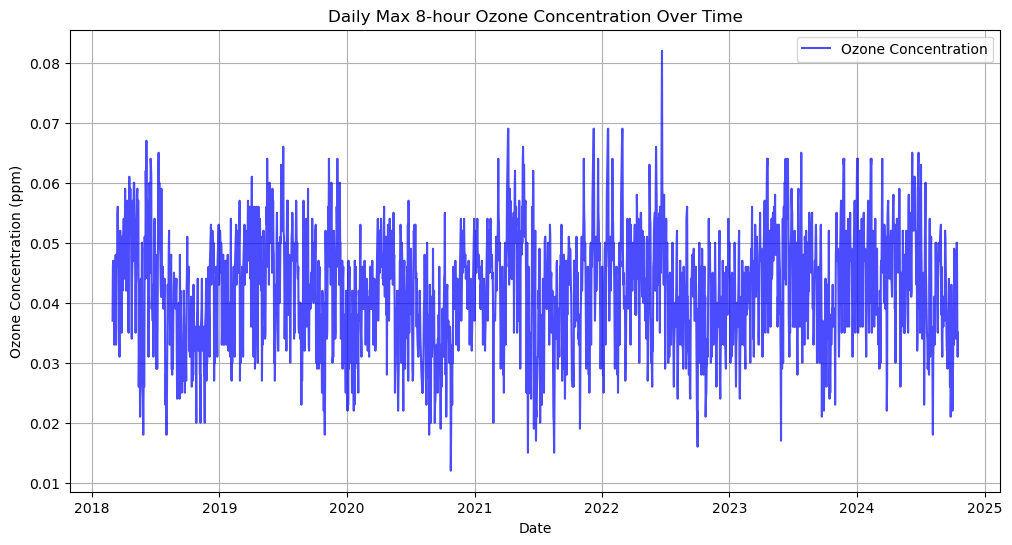

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Ozone Concentration", color="b", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Ozone Concentration (ppm)")
plt.title("Daily Max 8-hour Ozone Concentration Over Time")
plt.legend()
plt.grid()
plt.show()

In [8]:
model = Prophet()
model.fit(df_prophet)

12:11:20 - cmdstanpy - INFO - Chain [1] start processing
12:11:21 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [10]:
future = model.make_future_dataframe(periods=365)

In [11]:
forecast = model.predict(future)

In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-01,0.042157,0.031776,0.055777,0.042157,0.042157,0.001760,0.001760,0.001760,0.000553,0.000553,0.000553,0.001207,0.001207,0.001207,0.0,0.0,0.0,0.043917
1,2018-03-02,0.042156,0.031889,0.054857,0.042156,0.042156,0.001715,0.001715,0.001715,0.000588,0.000588,0.000588,0.001127,0.001127,0.001127,0.0,0.0,0.0,0.043871
2,2018-03-03,0.042155,0.031541,0.054442,0.042155,0.042155,0.000821,0.000821,0.000821,-0.000216,-0.000216,-0.000216,0.001037,0.001037,0.001037,0.0,0.0,0.0,0.042976
3,2018-03-04,0.042154,0.030757,0.053126,0.042154,0.042154,0.000127,0.000127,0.000127,-0.000815,-0.000815,-0.000815,0.000942,0.000942,0.000942,0.0,0.0,0.0,0.042281
4,2018-03-05,0.042153,0.030916,0.054295,0.042153,0.042153,0.000737,0.000737,0.000737,-0.000107,-0.000107,-0.000107,0.000844,0.000844,0.000844,0.0,0.0,0.0,0.042890


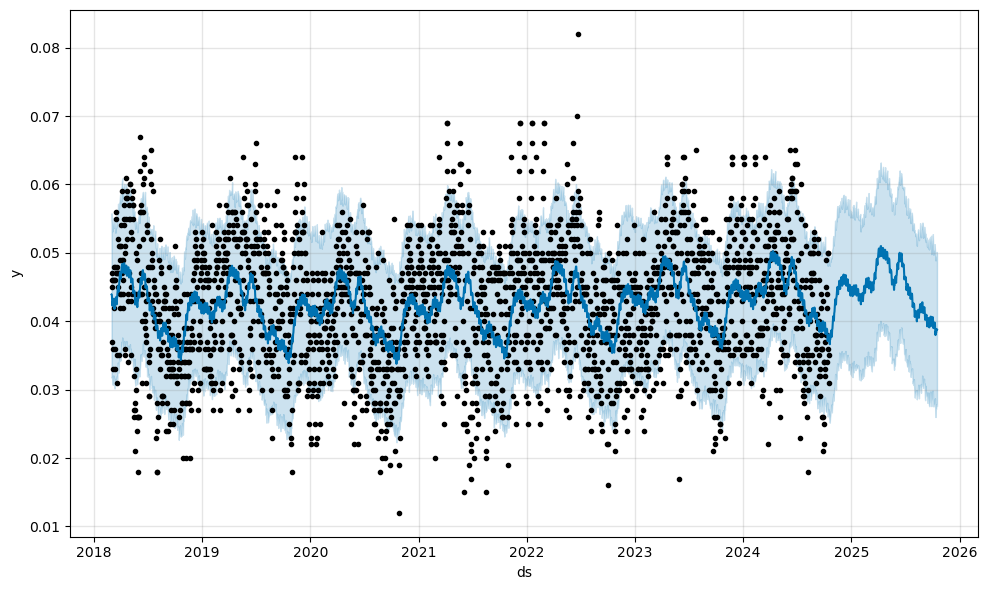

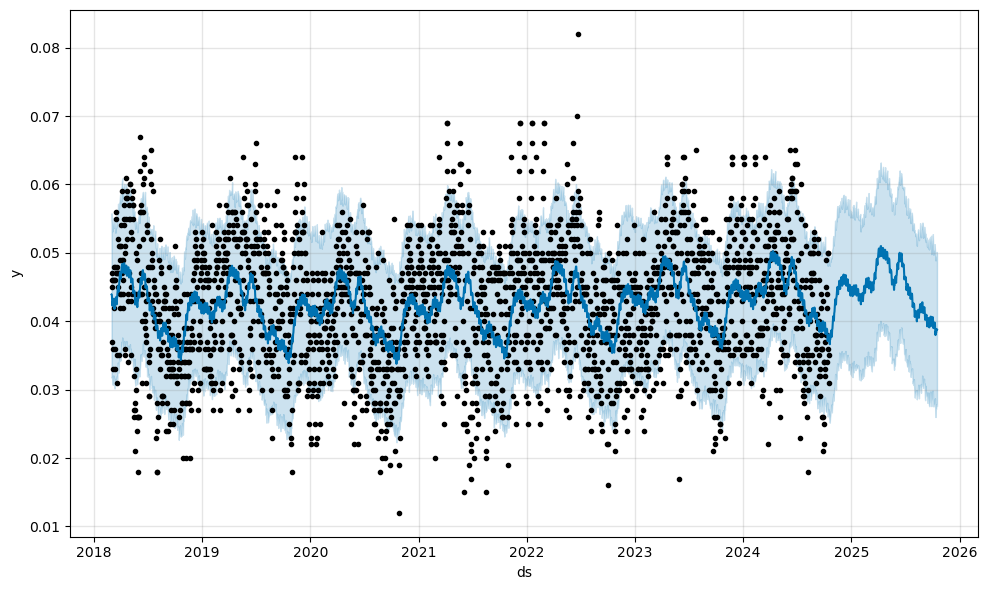

In [13]:
fig1 = model.plot(forecast)
fig1

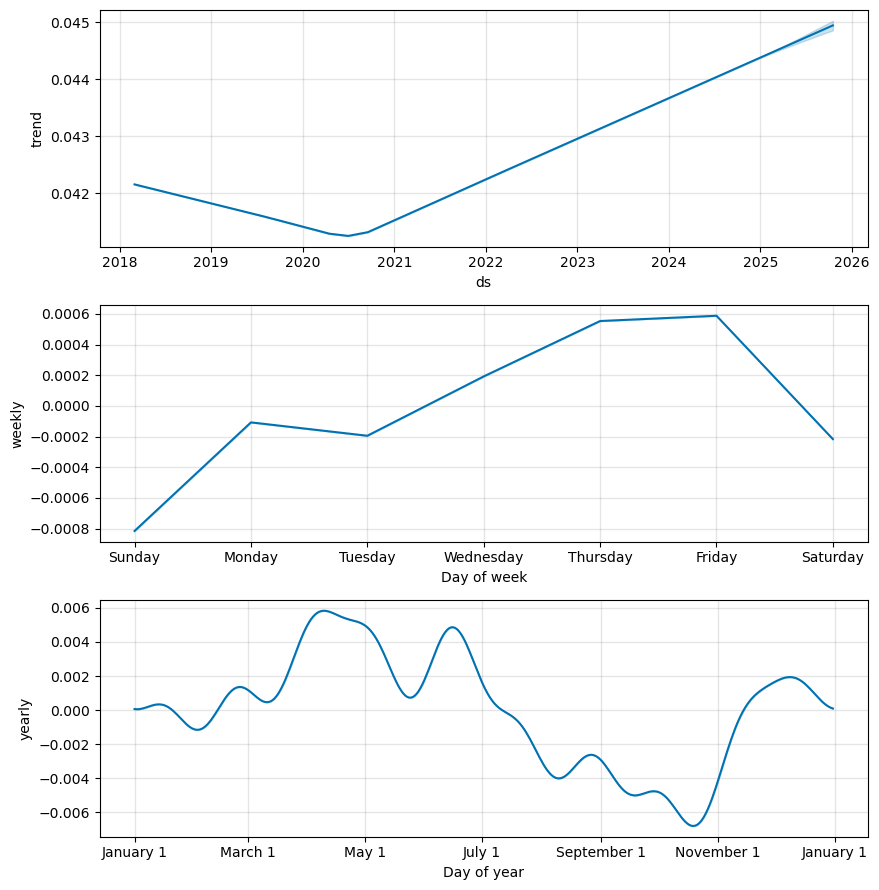

In [14]:
fig2 = model.plot_components(forecast)
plt.show()

In [15]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

  0%|          | 0/8 [00:00<?, ?it/s]

12:11:24 - cmdstanpy - INFO - Chain [1] start processing
12:11:25 - cmdstanpy - INFO - Chain [1] done processing
12:11:25 - cmdstanpy - INFO - Chain [1] start processing
12:11:25 - cmdstanpy - INFO - Chain [1] done processing
12:11:26 - cmdstanpy - INFO - Chain [1] start processing
12:11:26 - cmdstanpy - INFO - Chain [1] done processing
12:11:27 - cmdstanpy - INFO - Chain [1] start processing
12:11:27 - cmdstanpy - INFO - Chain [1] done processing
12:11:27 - cmdstanpy - INFO - Chain [1] start processing
12:11:27 - cmdstanpy - INFO - Chain [1] done processing
12:11:28 - cmdstanpy - INFO - Chain [1] start processing
12:11:28 - cmdstanpy - INFO - Chain [1] done processing
12:11:29 - cmdstanpy - INFO - Chain [1] start processing
12:11:29 - cmdstanpy - INFO - Chain [1] done processing
12:11:29 - cmdstanpy - INFO - Chain [1] start processing
12:11:30 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
from prophet.diagnostics import performance_metrics

# Compute performance metrics
df_p = performance_metrics(df_cv)

# Display the metrics
print(df_p.head())

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  0.000099  0.009959  0.008223  0.216371  0.171616  0.198848   
1 38 days  0.000102  0.010106  0.008340  0.220004  0.172509  0.201343   
2 39 days  0.000104  0.010178  0.008396  0.217887  0.173216  0.200767   
3 40 days  0.000108  0.010402  0.008586  0.221714  0.178477  0.204321   
4 41 days  0.000112  0.010567  0.008727  0.224872  0.180722  0.207107   

   coverage  
0  0.717466  
1  0.712329  
2  0.707192  
3  0.696918  
4  0.684932  


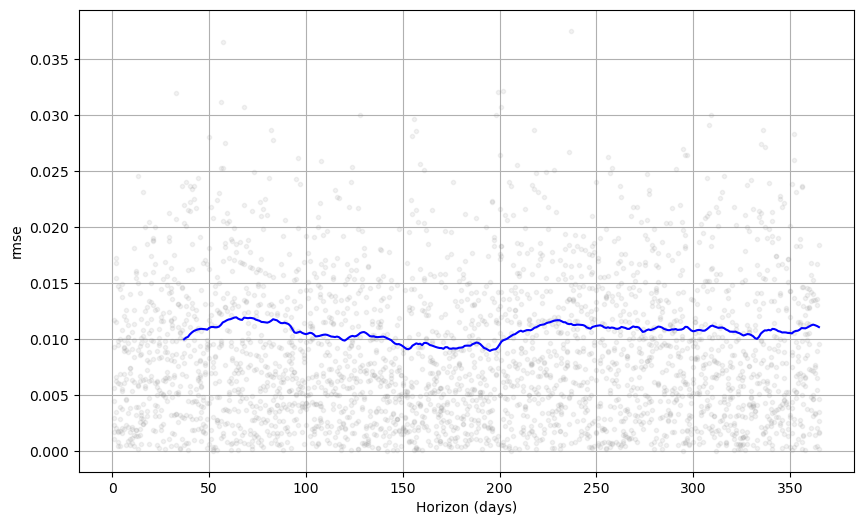

In [17]:
from prophet.plot import plot_cross_validation_metric

# Plot the Mean Absolute Error (MAE) over the forecast horizon
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()